In [13]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import json
from cleaning import *

In [2]:
data = pd.read_excel('./input/RawData_ComesF.xlsx',"Planilha2",index_col=False)

In [3]:
contatos = pd.read_excel('./input/RawData_ComesF.xlsx',"Contatos01",index_col=False)
contatos02 = pd.read_excel('./input/RawData_ComesF.xlsx',"Contatos02",index_col=False)

In [4]:
data = data.rename(columns={'enfant gardé chez assist. Mat.\nassistante maternelle ?': 'enfant gardé chez assist. Mat. assistante maternelle ?'})
data = data.rename(columns={'enfant  gardé maison/en famille ?': 'enfant  gardé maison en famille ?'})

contatos = contatos.rename(columns={ 'jour1mois1' : 'dia/mês'})
contatos = contatos.rename(columns = {'Nombre de contacts saisis JOUR 1' : 'Número de Contatos'})

contatos02 = contatos02.rename(columns={ 'jour2mois2' : 'dia/mês'})
contatos02 = contatos02.rename(columns = {'Nombre de contacts saisis JOUR 2' : 'Número de Contatos'})

In [5]:
data.head()

,vague,num questio,CONTRÔLE Num Questio versus recrut Tel,Type de questionnaire,Age du sujet de l'enquête,Sexe du sujet de l'enquête,Lien du répondant pour l'enfant <15 ans Sujet de l'enquête,Age du répondant pour l'enfant <15 ans Sujet de l'enquête,Sexe du répondant pour l'enfant <15 ans Sujet de l'enquête,Nombre de personnes au foyer,...,profession qui entraîne beaucoup de contacts ?,nombre de contacts en milieu pro,tranche(s) d'âge des contacts en milieu pro,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,A ou non plus de 20 contacts professionnels,Nombre d'étudiants dans la classe,Etudiant qui mange à la cantine ?
0,2,15218,1,1,38,2,NaN,NaN,NaN,2,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
1,2,3996,1,0,0,2,1.0,29.0,1.0,4,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
2,2,14409,1,1,18,2,NaN,NaN,NaN,4,...,NaN,NaN,0,0,0,0,0,NaN,3.0,3.0
3,2,952,1,1,74,1,NaN,NaN,NaN,2,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN
4,2,12382,1,1,71,1,NaN,NaN,NaN,1,...,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN


In [6]:
df = change_age(data)
df = change_mode(df)
df = change_traches(df)
df = change_column(df)
df.head()

,onda,pergunta de número,CONTROL Num Questionio versus recrutar Tel,Tipo de questionário,Q1_cQ1,Q2,cQ2,cQ1,cQ6,Q_,...,cQ18b,Q8,Q8a,Q8c,Q9,Q10,Q3,Q5a_cQ4,Q5b_cQ4b,Q8b
0,2,15218,1,1,38,2,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"[38.0, 68.0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0, 0, 0]"
1,2,3996,1,0,0,2,1.0,29.0,1.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,"[29.0, 0.0, 3.0, 33.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
2,2,14409,1,1,18,2,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,3.0,3.0,"[18.0, 49.0, 48.0, 16.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"
3,2,952,1,1,74,1,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,"[74.0, 81.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
4,2,12382,1,1,71,1,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,[71.0],"[1, 0, 1]","[1, 0, 0]","[0, 0, 0, 0, 0]"


In [7]:
criancas = df[df["Tipo de questionário"] == 0].reset_index()
adultos = df[df["Tipo de questionário"] == 1].reset_index()
adultos = remove_adultos(adultos,0)
criancas = remove_adultos(criancas,1)

In [8]:
adultos.head()

,index,onda,pergunta de número,Q1_cQ1,Q2,Q_,Q_1,Q4_cQ8,Q6_cQ9,Q7_cQ10,Q8,Q8a,Q8c,Q9,Q10,Q3,Q5a_cQ4,Q5b_cQ4b,Q8b
0,0,2,15218,38,2,2,59,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,"[38.0, 68.0]","[0, 1, 0]","[0, 0, 0]","[0, 0, 0, 0, 0]"
1,2,2,14409,18,2,4,8,2.0,7.0,NaN,NaN,NaN,NaN,3.0,3.0,"[18.0, 49.0, 48.0, 16.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"
2,3,2,952,74,1,2,49,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,"[74.0, 81.0]","[1, 0, 1]","[1, 0, 1]","[0, 0, 0, 0, 0]"
3,4,2,12382,71,1,1,37,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,[71.0],"[1, 0, 1]","[1, 0, 0]","[0, 0, 0, 0, 0]"
4,5,2,9631,67,2,2,37,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,"[67.0, 65.0]","[1, 0, 0]","[1, 0, 0]","[0, 0, 0, 0, 0]"


In [9]:
criancas.head()

,index,onda,pergunta de número,Q1_cQ1,cQ2,cQ1,cQ6,Q4_cQ8,Q6_cQ9,Q7_cQ10,...,cQ14,cQ14a,cQ15,cQ16,cQ17,cQ18,cQ18a,cQ18b,Q5a_cQ4,Q5b_cQ4b
0,1,2,3996,0,1.0,29.0,1.0,5.0,5.0,10.0,...,2.0,NaN,4.0,NaN,NaN,2.0,NaN,NaN,"[1, 0, 1]","[1, 0, 1]"
1,6,2,17843,4,1.0,34.0,1.0,2.0,5.0,11.0,...,NaN,NaN,NaN,2.0,3.0,1.0,1.0,1.0,"[1, 1, 0]","[1, 0, 0]"
2,8,2,9830,9,1.0,43.0,1.0,6.0,5.0,10.0,...,NaN,NaN,NaN,1.0,3.0,1.0,1.0,4.0,"[1, 0, 1]","[1, 0, 1]"
3,18,2,4006,2,1.0,31.0,1.0,6.0,5.0,10.0,...,2.0,NaN,9.0,NaN,NaN,2.0,NaN,NaN,"[1, 0, 1]","[1, 0, 1]"
4,19,2,11515,12,1.0,45.0,1.0,3.0,5.0,7.0,...,NaN,NaN,NaN,2.0,3.0,2.0,NaN,NaN,"[0, 1, 1]","[1, 0, 0]"


In [187]:
a = [profissional(i,adultos) for i in adultos.index]

In [207]:
create_adult(adultos,a)

In [13]:
erro = [i for i in df.columns[15:28] if 9. in df[i].unique()]
writer = pd.ExcelWriter('./dados/erros.xlsx')
cont = 0
for i in erro:
    df[df[i] == 9].to_excel(writer, sheet_name=f'{i}')
writer.save()

<ipython-input-13-bd0e808c1fd3>:6: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [10]:
adultos["index"] = [i for i in range(adultos.index[-1]+1)]
criancas["index"] = ['c'+str(i) for i in range(criancas.index[-1]+1)]

In [15]:
writer = pd.ExcelWriter('./dados/questionario.xlsx')
adultos.to_excel(writer, sheet_name='adultos',index= False)
criancas.to_excel(writer, sheet_name='criancas',index= False)
writer.save()

<ipython-input-15-1a295fcb96e4>:6: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [245]:
c = [school(i,criancas) for i in criancas.index]

In [246]:
create_children(criancas,c)

In [250]:
writer = pd.ExcelWriter('./dados/output.xlsx')
create_children(criancas,c,writer)
create_adult(adultos,a,writer)
writer.save()

/tmp/ipykernel_72347/1068784368.py:4: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [10]:
contatos.head()

,dia/mês,CONTRÔLE validation jour1mois1 en période vague 1 ou 2,joursemaine1,Vacances jour1mois1,Número de Contatos,age min,age max,age moyen,sexe,lieux,...,lieux .39,lieux 86,lieux 87,lieux 88,lieux 89,lieux 90,lieux 91,freq .39,peau .39,durée .39
0,105.0,1.0,2.0,1,2,68.0,NaN,68.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2004.0,1.0,5.0,1,6,29.0,NaN,29.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,205.0,1.0,3.0,1,11,49.0,NaN,49.0,1.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,2904.0,1.0,7.0,2,6,81.0,NaN,81.0,2.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2004.0,1.0,5.0,2,3,73.0,NaN,73.0,2.0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [11]:
contacts = get_json(contatos,df)
contacts02 = get_json(contatos02,df)

In [ ]:
with open('./dados/contatos_dia1.json', 'w') as f:
    json.dump(contacts, f)
with open('./dados/contatos_dia2.json', 'w') as f:
    json.dump(contacts02, f)

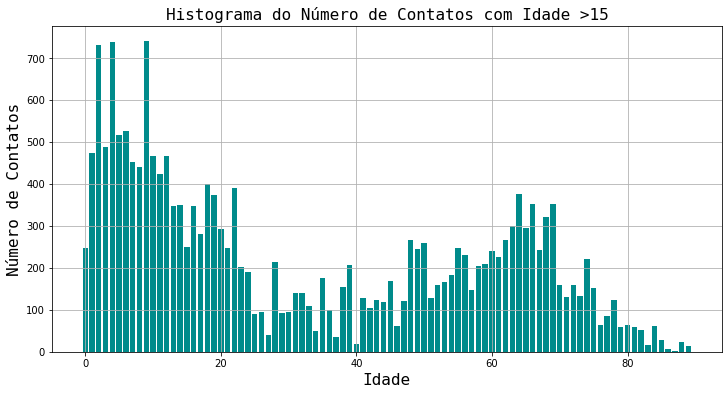

In [12]:
plot_contatos_idade(
    contacts,
    criancas,
    adultos,
    'idade_contatos'
    ,'Histograma do Número de Contatos com Idade >15'
)

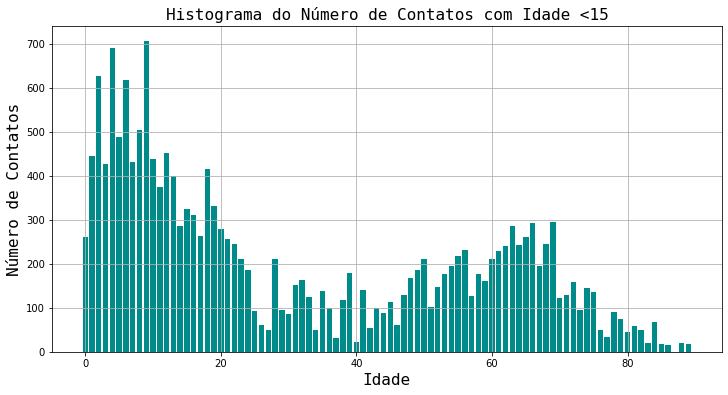

In [13]:
plot_contatos_idade(
    contacts02,
    criancas,
    adultos,
    'idade_contatos02',
    'Histograma do Número de Contatos com Idade <15'
)

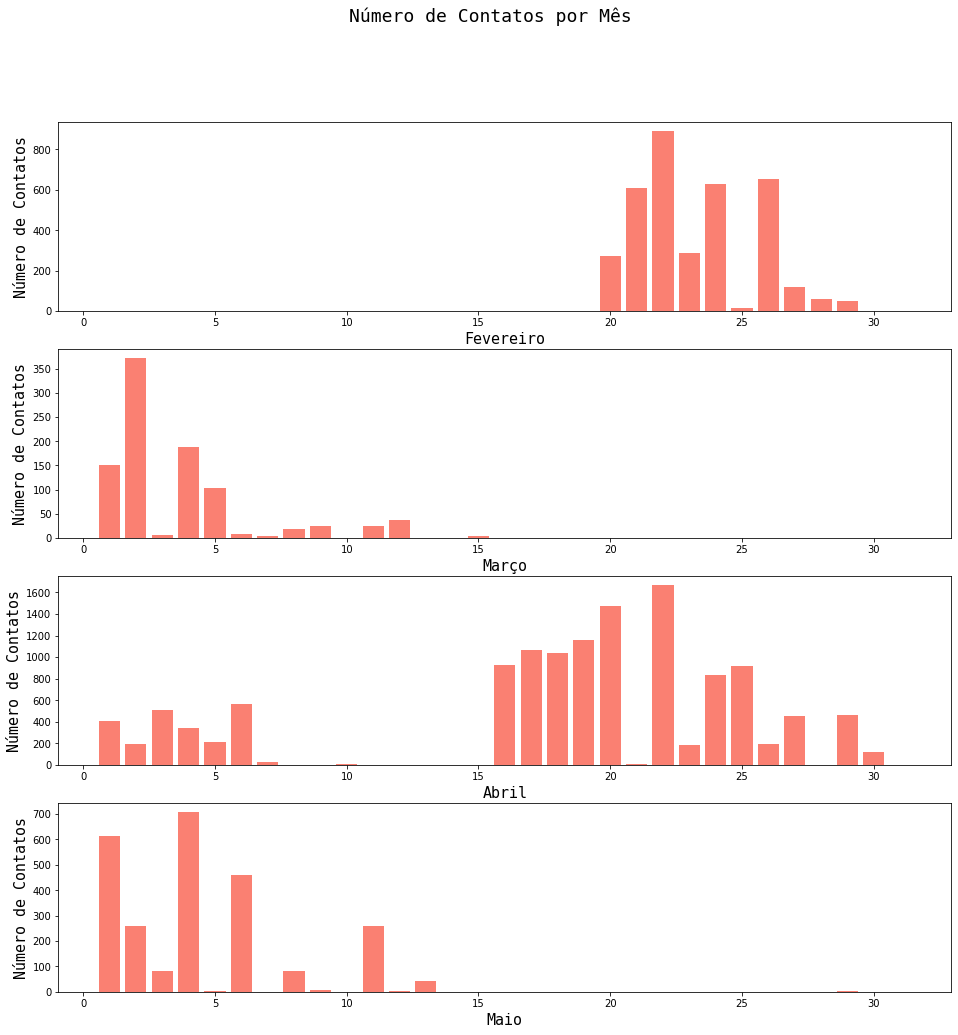

In [234]:
plot_mes(contatos,'contatos_mes')

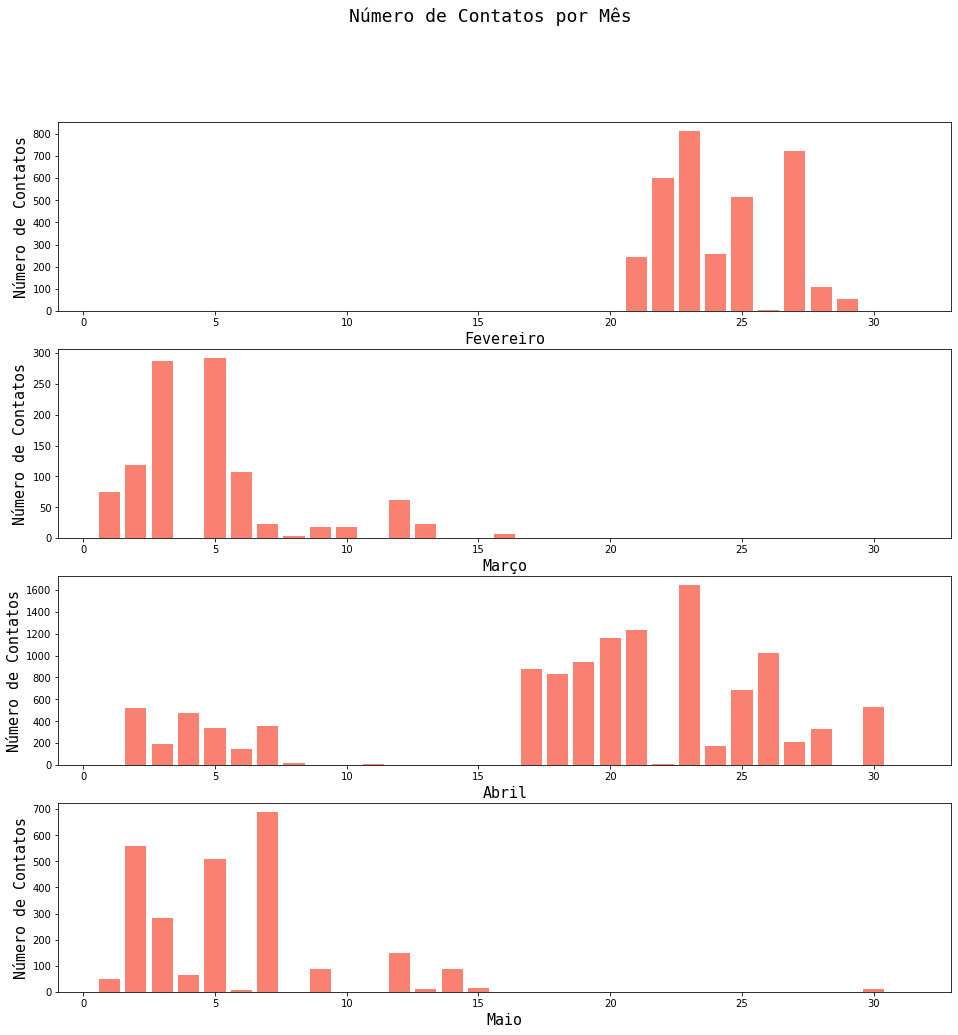

In [235]:
plot_mes(contatos02,'contatos_mes02')

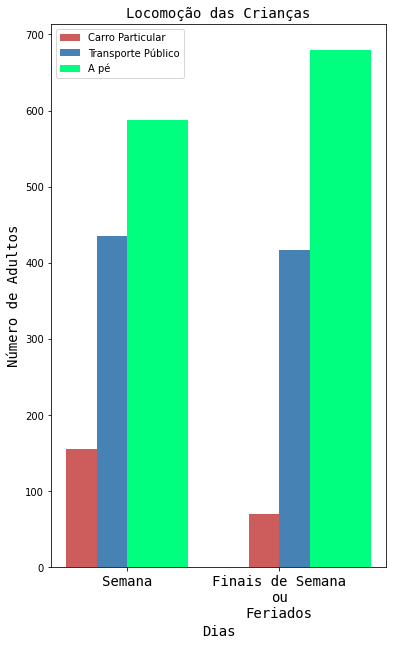

In [14]:
locomotion_adultos(
    criancas,
    'Locomoção das Crianças',
    'locomotion_criancas'
)

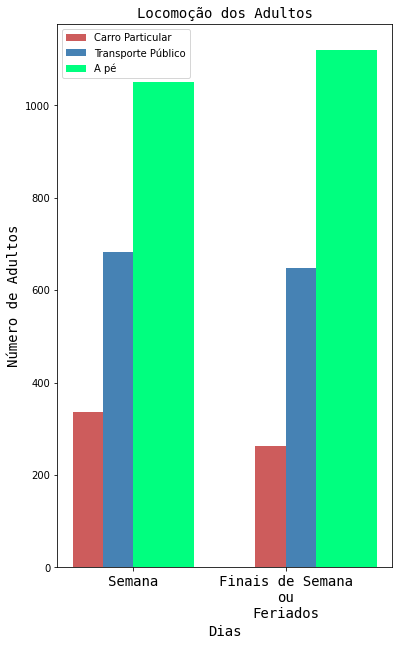

In [15]:
locomotion_adultos(
    adultos,
    'Locomoção dos Adultos',
    'locomotion_adultos'
)

In [37]:
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

[[0.47965788 0.52034212]
 [0.57640587 0.42359413]
 [0.72169811 0.27830189]
 [0.79216182 0.20783818]
 [0.88977713 0.11022287]]
[[0.8014267  0.1985733 ]
 [0.6990337  0.3009663 ]
 [0.73326836 0.26673164]
 [0.72431078 0.27568922]
 [0.27181853 0.72818147]]
[[0.4613351  0.5386649  0.69332452 0.93588896 1.96430932]
 [0.5149633  0.4850367  0.53924337 0.56973461 0.28345567]
 [0.55972953 0.44027047 0.48685199 0.58752817 0.24042074]
 [0.57630009 0.42369991 0.36487639 0.4458653  0.27365729]
 [0.70290635 0.29709365 0.20452099 0.16469322 0.04467169]]


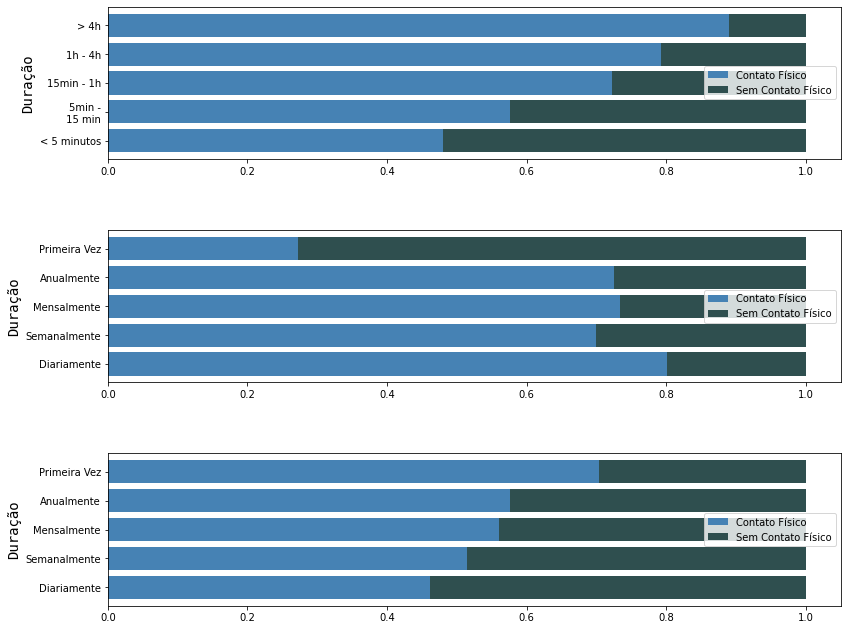

In [48]:
multiple_stacked_bar(
    contacts
)

In [86]:
hist = [[0]*5,[0]*5]

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]